#Information Theory

Image registeration for a set of cropped brain MRI images considering mutual information and KL divergence

In [ ]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

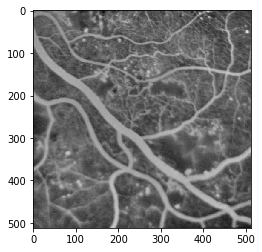

In [ ]:
img = Image.open("img_retina.jpg")
imgdata= np.array(img.getdata())
width, height = img.size

plt.imshow(imgdata.reshape(width,height) , 'gray')

In [ ]:
def Entropy (data):
    Ent=0
    #unique, counts = np.unique(imgdata, return_counts=True)
    #counts = counts / len(imgdata)
    p,bins=np.histogram([data],bins=np.arange(np.min(data),np.max(data)+2,1),density=True)
    p=p[p!=0]
    logp = np.log2(p)
    Ent = sum(p*logp) 
    return -Ent

In [ ]:
HI = Entropy(imgdata)
print('The entropy of image is %f' %(HI))

The entropy of image is 6.847118


In [ ]:
def MutualInf(data1,data2):
    
    px,bins =np.histogram([data1],bins=np.arange(np.min(data1),np.max(data1)+2,1),density=True)
    py,bins =np.histogram([data2],bins=np.arange(np.min(data2),np.max(data2)+2,1),density=True)
    pxy,bins =np.histogramdd([data1,data2],bins=[np.arange(np.min(data1),np.max(data1)+2,1),np.arange(np.min(data2),np.max(data2)+2,1)],density=True)
    MI=0
    for x in range(len(px)):
        for y in range(len(py)):
            pj= pxy[x,y]
            p1= px[x]
            p2= py[y]
            if (p1 and p2 and pj):
                MI += pj * math.log2(pj/(p1*p2))
    return MI

In [ ]:
def JointEnt(data1,data2):
    pxy,bins =np.histogramdd([data1,data2],bins=[np.arange(np.min(data1),np.max(data1)+2,1),np.arange(np.min(data2),np.max(data2)+2,1)],density=True)
    pxy=pxy[pxy!=0]
    logpxy=np.log2(pxy)
    JE= sum(pxy*logpxy)
    return -JE

In [ ]:
HIA=[]
HNA=[]
MIA=[]
for A in range (0,201,5):
    IA = np.random.randint(low=-A , high=A+1, size=(width,height))
    HNA = np.append(HNA,Entropy(IA.ravel()))
    HIA = np.append(HIA,Entropy(IA.ravel()+imgdata))
    MIA = np.append(MIA,MutualInf(imgdata,IA.ravel()+imgdata))

    
    if (A==10 or A==80 or A==180):
        Image.fromarray((np.reshape(IA.ravel()+imgdata,(width,height))).astype(np.uint8)).save('Noisy'+str(A)+'.jpg')
        
    if (A==20):
        JE = JointEnt(imgdata,IA.ravel()+imgdata)
        print ('Joint Entropy H(I,I+A) =' , JE)
        print ('\nverifying if H(I; I + N20) = H(I) + H(I + N20) − MI(I; I + N20) ')
        print ( '%f = %f + %f - %f' %(JE , HI , HIA[4] , MIA[4]))

Joint Entropy H(I,I+A) = 12.182733884167519

verifying if H(I; I + N20) = H(I) + H(I + N20) − MI(I; I + N20) 
12.182734 = 6.847118 + 7.013801 - 1.678186


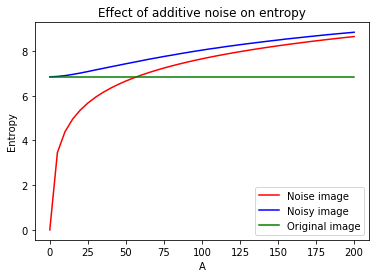

In [ ]:
plt.title("Effect of additive noise on entropy")
plt.plot(np.arange(0,201,5),HNA, 'r-' )
plt.plot(np.arange(0,201,5),HIA, 'b-' )
plt.plot(np.arange(0,201,5),np.full((41,),HI), 'g-' )
plt.ylabel('Entropy')
plt.xlabel('A')
plt.legend(['Noise image', 'Noisy image','Original image'])
plt.savefig('Q1_1 Entropy of an image.jpg',bbox_inches='tight', dpi=400)
plt.show()

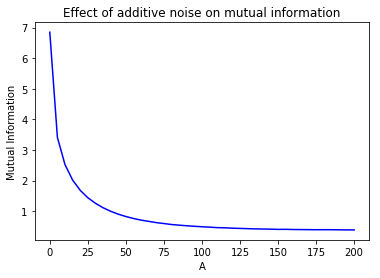

In [ ]:
plt.title("Effect of additive noise on mutual information")
plt.plot(np.arange(0,201,5),MIA, 'b-' )
plt.ylabel('Mutual Information')
plt.xlabel('A')
plt.savefig('Q1_2 Mutual information.jpg',bbox_inches='tight', dpi=400)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Parzen window

In [ ]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


def parzen_out(data,sigma, x):
    p = np.sum( gaussian( x ,d, sigma) for d in data ) #/len(data)
    q = p/np.sum(p)
    return np.concatenate(([x],[q]),axis=0) 

Text(0, 0.5, 'Signal')

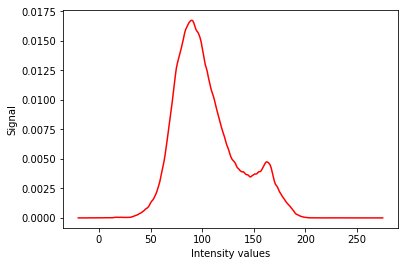

In [ ]:
p_est_I=parzen_out(imgdata,1, np.arange(np.min(imgdata)-20,np.max(imgdata)+21 , 1) )


plt.plot(p_est_I[0,:],p_est_I[1,:],'r-')
plt.xlabel('Intensity values')
plt.ylabel('Signal')


## KL Divergence 

In [ ]:
def KL_histo(data1,data2):
    top= max( np.max(data1) , np.max(data2) ) 
    bottom= min ( np.min(data1) , np.min(data2) )
    p,bins =np.histogram([data1],bins=np.arange(bottom,top+1,1),density=True)
    q,bins =np.histogram([data2],bins=np.arange(bottom,top+1,1),density=True)
    
    KL=0
    for i in range (len(bins)-1):
        if (p[i] and q[i]):
            KL += p[i] * math.log2(q[i]/p[i])
        else:
            return math.inf
    return -KL
    

In [ ]:
def KL(p,q):
    KL=0
    for i in range (len(bins)-1):
        if (p[i] and q[i]):
            KL += p[i] * math.log2(q[i]/p[i])
        else:
            return math.inf
    return -KL

### for image and noise

In [ ]:
IA = np.random.randint(low=0, high=256, size=(width,height))

KL_forward = KL_histo(imgdata,IA.ravel())
KL_backward = KL_histo(IA.ravel(),imgdata)
print('for noises drawn from U[0:255] \n KL_forward=%f  KL_backward=%f' %(KL_forward, KL_backward))

for noises drawn from U[0:255] 
 KL_forward=inf  KL_backward=inf


for noises drawn from U[0:255] 
 smoothing signals with sigma = 1.000000 
KL_forward=-0.047660  KL_backward=1.164976


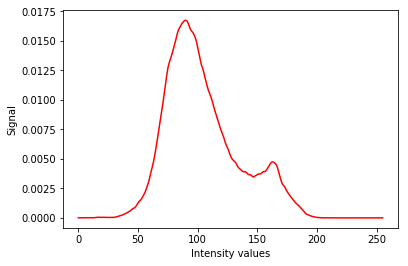

In [ ]:
sigma=1

data_smooth=parzen_out(imgdata,sigma, np.arange(0,256,1))

IA = np.random.randint(low=0, high=256, size=(width,height))
noise_smooth=parzen_out(IA.ravel(),sigma, np.arange(0,256,1))


plt.plot(data_smooth[0,:],data_smooth[1,:],'r-')
plt.xlabel('Intensity values')
plt.ylabel('Signal')

KL_forward = KL(data_smooth[1],noise_smooth[1])
KL_backward = KL(noise_smooth[1],data_smooth[1])
print('for noises drawn from U[0:255] \n smoothing signals with sigma = %f \nKL_forward=%f  KL_backward=%f' %(sigma,KL_forward, KL_backward))

### For image and noisy image

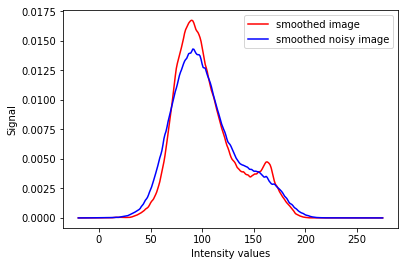

for noises drawn from U[-20:20] 
ans smoothing data with parzen window and sigma=1.000000 
 KL_forward=-0.002854  KL_backward=0.011698


In [ ]:
sigma=1

data_smooth=parzen_out(imgdata,sigma, np.arange(-20,276,1))

A=20
IA = np.random.randint(low=-A, high=A, size=(width,height))
noisy_smooth=parzen_out(imgdata+IA.ravel(),sigma, np.arange(-20,276,1))


plt.plot(data_smooth[0,:],data_smooth[1,:],'r-')
plt.plot(noisy_smooth[0,:],noisy_smooth[1,:],'b-')
plt.xlabel('Intensity values')
plt.ylabel('Signal')
plt.legend(['smoothed image', 'smoothed noisy image'])
plt.show()

KL_forward = KL(data_smooth[1],noisy_smooth[1])
KL_backward = KL(noisy_smooth[1],data_smooth[1])

print('for noises drawn from U[-%d:%d] \nans smoothing data with parzen window and sigma=%f \n KL_forward=%f  KL_backward=%f' %(A ,A ,sigma, KL_forward, KL_backward))

## Image Registeration

In [ ]:
img = Image.open("I1_1.png")
imgdata11= np.array(img.getdata(band=0))
width1_1, height1_1 = img.size

img = Image.open("I1_2.png")
imgdata12= np.array(img.getdata(band=0))
width1_2, height1_2 = img.size

img = Image.open("I2_1.png")
imgdata21= np.array(img.getdata(band=0))
width2_1, height2_1 = img.size

img = Image.open("I2_2.png")
imgdata22= np.array(img.getdata(band=0))
width2_2, height2_2 = img.size

if (width1_1==width1_2==width2_1==width2_2):
    width=width1_1
if (height1_1==height1_2==height2_1==height2_2):
    height=height1_1


In [ ]:
def T(data,w,h,x,y):
    
    data=data.reshape((w,h))
    data=np.pad(data, pad_width=((abs(x),abs(x)),(abs(y),abs(y))),mode='constant',constant_values=0)
    data= data[ abs(x)+x:abs(x)+x+h , abs(y)+y:abs(y)+y+w]
    
    return data.ravel()

In [ ]:
def SE(data1,data2):
    return (np.square(data1-data2)).mean()

### First pair of images

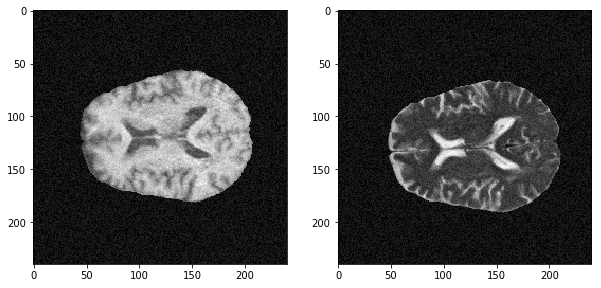

In [ ]:
fig, ax = plt.subplots(nrows =1 , ncols =2 , figsize=(10,10))

ax[0].imshow(imgdata11.reshape(width,height),'gray')
ax[1].imshow(imgdata12.reshape(width,height),'gray')

In [ ]:
x = np.arange(-20,21,1)
y = np.arange(-20,21,1)
SE_er1= np.zeros((len(x),len(y)))
MI_er1= np.zeros((len(x),len(y)))


for i in range(len(x)):
    for j in range(len(y)):
        transformed_data = T(imgdata11,width,height,x[i],y[j])
        SE_er1[i,j] = SE( transformed_data  ,  imgdata12  )
        MI_er1[i,j] = MI(  transformed_data ,  imgdata12  )

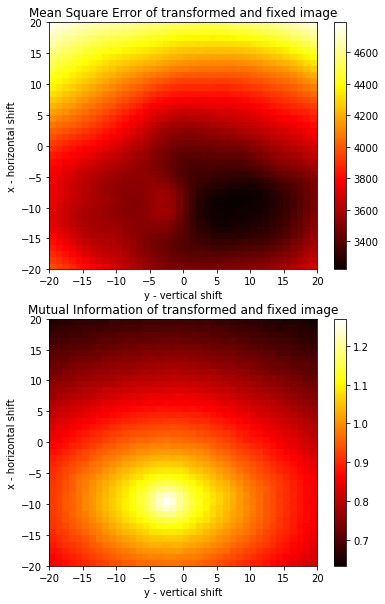



Shifting as x=-9 and y=8 lead to minimun square error
Shifting as x=-10 and y=-3 lead to maximum mutual information


In [ ]:

fig, ax = plt.subplots(nrows =2 , ncols =1 , figsize=(6,10))

c0 = ax[0].pcolormesh(x, y, SE_er1, cmap='hot', vmin=np.min(SE_er1), vmax=np.max(SE_er1))
ax[0].set_title('Mean Square Error of transformed and fixed image')
ax[0].axis([x.min(), x.max(), y.min(), y.max()])
ax[0].set_xlabel('y - vertical shift')
ax[0].set_ylabel('x - horizontal shift')
fig.colorbar(c0, ax=ax[0])


c1 = ax[1].pcolormesh(x, y, MI_er1, cmap='hot', vmin=np.min(MI_er1), vmax=np.max(MI_er1))
ax[1].set_title('Mutual Information of transformed and fixed image')
ax[1].axis([x.min(), x.max(), y.min(), y.max()])
ax[1].set_xlabel('y - vertical shift')
ax[1].set_ylabel('x - horizontal shift')
fig.colorbar(c1, ax=ax[1])

fig.savefig('transformation1.png', dpi=fig.dpi)
plt.show()



SE_indx_best1= np.unravel_index(SE_er1.argmin(), SE_er1.shape)
MI_indx_best1= np.unravel_index(MI_er1.argmax(), MI_er1.shape)

print('\n\nShifting as x=%d and y=%d lead to minimun square error' %(x[SE_indx_best1[0]]  , y[SE_indx_best1[1]]   ))
print('Shifting as x=%d and y=%d lead to maximum mutual information' %(x[MI_indx_best1[0]]  , y[MI_indx_best1[1]]   ))




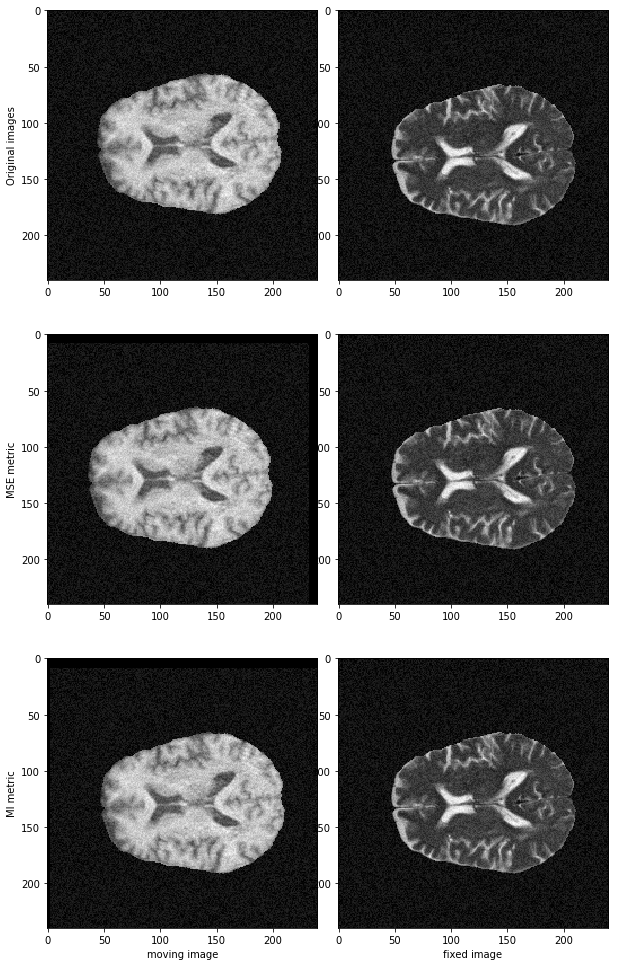

In [ ]:
fig, ax = plt.subplots(nrows =3 , ncols =2 , figsize=(8,15))
#plt.axis("off")

ax[0,0].imshow(imgdata11.reshape(width,height),'gray')
ax[0,0].set_ylabel('Original images')
ax[0,1].imshow(imgdata12.reshape(width,height),'gray')

ax[1,0].imshow(T(imgdata11,width,height,x[SE_indx_best1[0]]  , y[SE_indx_best1[1]] ).reshape(width,height),'gray')
ax[1,0].set_ylabel('MSE metric')
ax[1,1].imshow(imgdata12.reshape(width,height),'gray')

ax[2,0].imshow(T(imgdata11,width,height,x[MI_indx_best1[0]]  , y[MI_indx_best1[1]] ).reshape(width,height),'gray')
ax[2,0].set_ylabel('MI metric')
ax[2,0].set_xlabel('moving image')
ax[2,1].imshow(imgdata12.reshape(width,height),'gray')
ax[2,1].set_xlabel('fixed image')

fig.subplots_adjust(wspace=0.02, hspace=0.2, top=0.9, bottom=0.05, left=0, right=1)

fig.savefig('pair1.png', dpi=fig.dpi , bbox_inches = "tight")



### Second pair of images

In [ ]:
x = np.arange(-30,21,1)
y = np.arange(-30,21,1)

SE_er2= np.zeros((len(x),len(y)))
MI_er2= np.zeros((len(x),len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        transformed_data = T(imgdata21,width,height,x[i],y[j])
        SE_er2[i,j] = SE( transformed_data  ,  imgdata22  )
        MI_er2[i,j] = MI(  transformed_data ,  imgdata22  )

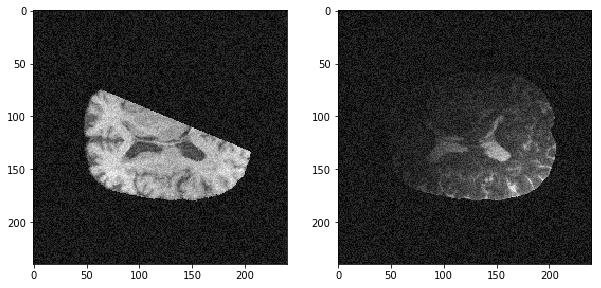

In [ ]:
fig, ax = plt.subplots(nrows =1 , ncols =2 , figsize=(10,10))

ax[0].imshow(imgdata21.reshape(width,height),'gray')
ax[1].imshow(imgdata22.reshape(width,height),'gray')

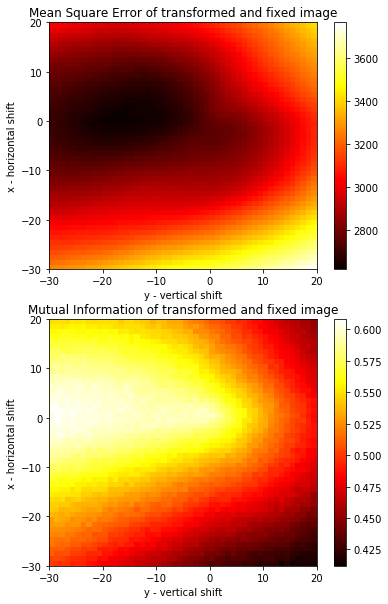



Shifting as x=7 and y=-6 lead to minimun square error
Shifting as x=9 and y=4 lead to maximum mutual information


In [ ]:

fig, ax = plt.subplots(nrows =2 , ncols =1 , figsize=(6,10))

c0 = ax[0].pcolormesh(x,y, SE_er2, cmap='hot', vmin=np.min(SE_er2), vmax=np.max(SE_er2))
ax[0].set_title('Mean Square Error of transformed and fixed image')
ax[0].axis([x.min(), x.max(), y.min(), y.max()])
ax[0].set_xlabel('y - vertical shift')
ax[0].set_ylabel('x - horizontal shift')
fig.colorbar(c0, ax=ax[0])


c1 = ax[1].pcolormesh(x, y, MI_er2, cmap='hot', vmin=np.min(MI_er2), vmax=np.max(MI_er2))
ax[1].set_title('Mutual Information of transformed and fixed image')
ax[1].axis([x.min(), x.max(), y.min(), y.max()])
ax[1].set_xlabel('y - vertical shift')
ax[1].set_ylabel('x - horizontal shift')
fig.colorbar(c1, ax=ax[1])

fig.savefig('transformation2.png', dpi=fig.dpi)
plt.show()



SE_indx_best2= np.unravel_index(SE_er2.argmin(), SE_er.shape)
MI_indx_best2= np.unravel_index(MI_er2.argmax(), MI_er.shape)

print('\n\nShifting as x=%d and y=%d lead to minimun square error' %(x[SE_indx_best2[0]]  , y[SE_indx_best2[1]]   ))
print('Shifting as x=%d and y=%d lead to maximum mutual information' %(x[MI_indx_best2[0]]  , y[MI_indx_best2[1]]   ))

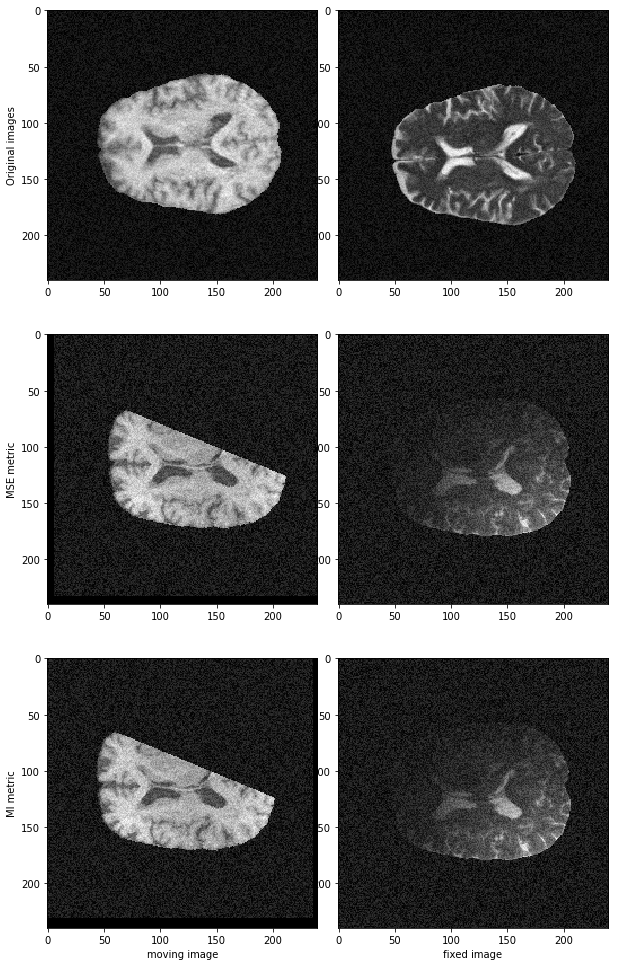

In [ ]:
fig, ax = plt.subplots(nrows =3 , ncols =2 , figsize=(8,15))

ax[0,0].imshow(imgdata11.reshape(width,height),'gray')
ax[0,0].set_ylabel('Original images')
ax[0,1].imshow(imgdata12.reshape(width,height),'gray')


ax[1,0].imshow(T(imgdata21,width,height,x[SE_indx_best2[0]]  , y[SE_indx_best2[1]] ).reshape(width,height),'gray')
ax[1,0].set_ylabel('MSE metric')
ax[1,1].imshow(imgdata22.reshape(width,height),'gray')

ax[2,0].imshow(T(imgdata21,width,height,x[MI_indx_best2[0]]  , y[MI_indx_best2[1]] ).reshape(width,height),'gray')
ax[2,0].set_ylabel('MI metric')
ax[2,0].set_xlabel('moving image')
ax[2,1].imshow(imgdata22.reshape(width,height),'gray')
ax[2,1].set_xlabel('fixed image')

fig.subplots_adjust(wspace=0.02, hspace=0.2, top=0.9, bottom=0.05, left=0, right=1)

fig.savefig('pair2.png', dpi=fig.dpi , bbox_inches = "tight")


